In [1]:
!pip install lifelines 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import lifelines    

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.5/349.5 kB 3.6 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 1.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.2/829.2 kB 3.6 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Using cached typing_extensions-4.3.0-py3-none-any.whl (25 kB)
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4032 sha256=557dda4af807a1d12f3b98935006d1ed47d798e63722690573f29c88f134bd34
  Stored in directory: /Users/seol-yoohwan/Library/Caches/pip/wheels/a8/03/64/8557323821d25118c3a2dc1646996f7a962a8970d4b7d22473
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491058 sha256=ecce00df8db1bcdc4cfde99d850cc9ded08dc5665f63681b36df8306cba31b0f
  Stored in directory: /Users/seol-yoohwan/Library/Caches/p

In [3]:
churn_data = pd.read_csv('/Users/seol-yoohwan/Documents/HS-restaurant-SYH/Churnrate_analysis/data/WA_Fn-UseC_-Telco-Customer-Churn.csv') 
# 재직 및 이탈 기능 변환 
churn_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
churn_data['tenure '] = churn_data['tenure'].astype(float) 
churn_data['Churn'] = churn_data['Churn'] == '예' 
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,False,1.0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,False,34.0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,False,2.0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,False,45.0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,False,2.0


Kaplan-Meier 생존 곡선을 사용하여 일반 고객의 생존율을 살펴보겠습니다.

/Users/seol-yoohwan/.conda/envs/pythonProject/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/seol-yoohwan/.conda/envs/pythonProject/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/seol-yoohwan/.conda/envs/pythonProject/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/seol-yoohwan/.conda/envs/pythonProject/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/seol-yoohwan/.conda/envs/pythonProject/lib/python3.9/site-packages/IPython/core/pylabt

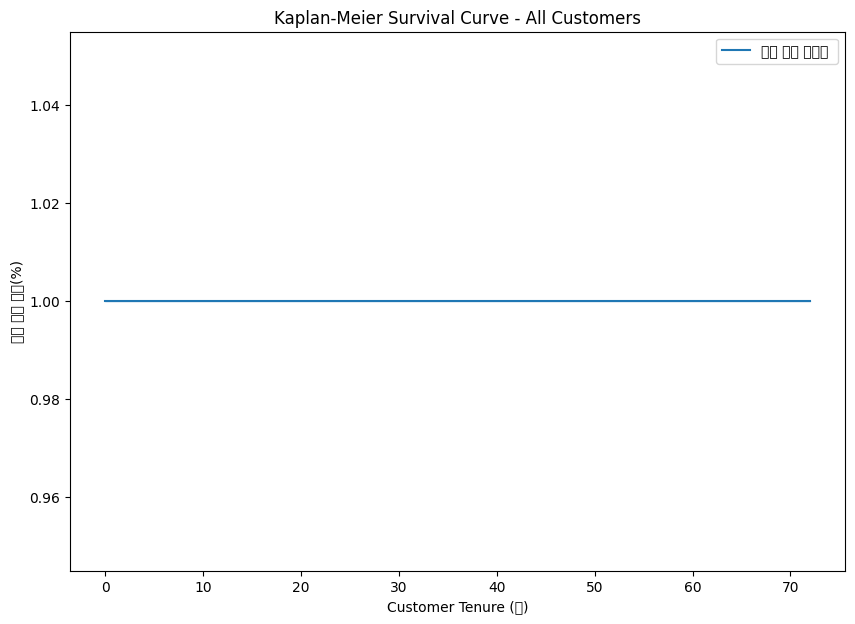

In [9]:
# 이탈 데이터에 대한 kmf 피팅 
t = churn_data['tenure'].values 
churn = churn_data['Churn'].values 
kmf = lifelines.KaplanMeierFitter() 
kmf.fit(t, event_observed = churn, label='평균 고객 추정치 ')

# kmf 곡선 그리기 
fig, ax = plt.subplots(figsize=(10,7)) 
kmf.plot(ax=ax) 
ax.set_title('Kaplan-Meier Survival Curve - All Customers') 
ax.set_xlabel('Customer Tenure (월)') 
ax.set_ylabel('고객 생존 확률(%)') 
plt.show()